<a href="https://colab.research.google.com/github/mehdiabbasidev/darsman-machine-learning/blob/main/GaussianMixtureModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.filterwarnings('ignore')

Silhouette Score: 0.5335021044401107
Davies-Bouldin Index: 0.7616404845025507
Number of clusters: 3
Number of noise points: 24


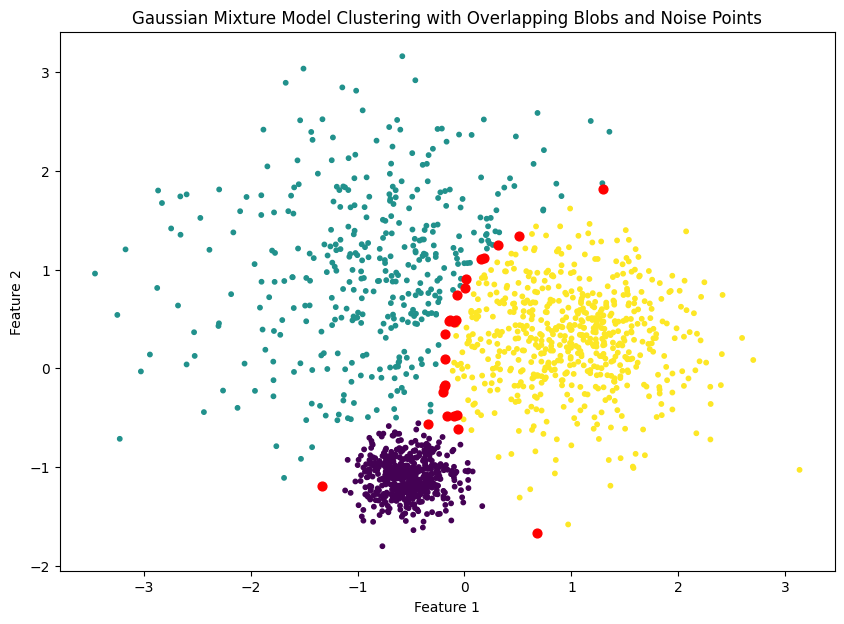

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt
import matplotlib as mpl

centers = [[0, 0], [3, 3], [0, 4]]
cluster_std = [0.4, 1.0, 1.8]
X, y = make_blobs(n_samples=1500, centers=centers, cluster_std=cluster_std)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

gmm = GaussianMixture(n_components=3, random_state=42)
gmm.fit(X_scaled)
labels = gmm.predict(X_scaled)

silhouette_avg = silhouette_score(X_scaled, labels)
davies_bouldin = davies_bouldin_score(X_scaled, labels)

print(f'Silhouette Score: {silhouette_avg}')
print(f'Davies-Bouldin Index: {davies_bouldin}')

probs = gmm.predict_proba(X_scaled)
threshold = 0.55
noise = np.max(probs, axis=1) < threshold

n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = len(X_scaled[noise, 0])
print(f'Number of clusters: {n_clusters}')
print(f'Number of noise points: {n_noise}')

plt.figure(figsize=(10, 7))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis', s=10, label='Clustered Points')
plt.scatter(X_scaled[noise, 0], X_scaled[noise, 1], color='red', s=40, label='Noise Points')
plt.title('Gaussian Mixture Model Clustering with Overlapping Blobs and Noise Points')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()